In [2]:
import pandas as pd
from pyfolio.timeseries import perf_stats
%matplotlib inline

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/backtest_2019-10-31_15-17.csv')
df['realizedPNL_net'] = df['realizedPNL'] - 3.02
df['cumsum'] = df.realizedPNL_net.cumsum()
df['result'] = 100000 + df['cumsum']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 00:50:00,2019-10-31 15:17:25.970319,NQZ9,SELL,1,6304.175,[1],1,entry,1,1.3,USD,0.0,2019-10-31 15:17:25.970586,-3.02,-3.02,99996.98
2018-02-09 01:15:00,2019-10-31 15:17:25.973439,NQZ9,BUY,1,6346.150,[2],2,stop-out,2,1.3,USD,-839.5,2019-10-31 15:17:25.973507,-842.52,-845.54,99154.46
2018-02-09 16:50:00,2019-10-31 15:17:26.522056,NQZ9,SELL,1,6300.250,[3],3,entry,3,1.3,USD,0.0,2019-10-31 15:17:26.522312,-3.02,-848.56,99151.44
2018-02-09 16:55:00,2019-10-31 15:17:26.522956,NQZ9,BUY,1,6348.625,[4],4,stop-out,4,1.3,USD,-967.5,2019-10-31 15:17:26.523001,-970.52,-1819.08,98180.92
2018-02-09 18:05:00,2019-10-31 15:17:26.687478,NQZ9,SELL,1,6280.100,[5],5,entry,5,1.3,USD,0.0,2019-10-31 15:17:26.687729,-3.02,-1822.10,98177.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 16:16:00,2019-10-31 15:40:36.640546,NQZ9,SELL,1,7609.825,[871],1002,entry,871,1.3,USD,0.0,2019-10-31 15:40:36.640936,-3.02,25676.18,125676.18
2019-09-03 16:41:00,2019-10-31 15:40:36.804398,NQZ9,BUY,1,7639.275,[872],1003,stop-out,872,1.3,USD,-589.0,2019-10-31 15:40:36.804467,-592.02,25084.16,125084.16
2019-09-03 19:51:00,2019-10-31 15:40:38.419814,NQZ9,SELL,1,7596.550,[873],1004,entry,873,1.3,USD,0.0,2019-10-31 15:40:38.420322,-3.02,25081.14,125081.14


In [4]:
len(df)

875

In [5]:
df.realizedPNL.sum()

27158.6

In [6]:
df.realizedPNL_net.sum()

24516.099999999977

In [7]:
returns = pd.DataFrame()
returns['dollars'] = df['result'].resample('D').last()
returns.loc[returns.index[0] - pd.Timedelta(days=1), 'dollars'] = 100000
returns.sort_index(inplace=True)
returns.dollars.fillna(method='ffill', inplace=True)
returns['returns'] = returns['dollars'].pct_change()
returns

,dollars,returns
time,,
2018-02-08,100000.00,NaN
2018-02-09,97256.86,-0.027431
2018-02-10,97256.86,0.000000
2018-02-11,97256.86,0.000000
2018-02-12,97256.86,0.000000
...,...,...
2019-08-31,126789.28,0.000000
2019-09-01,126789.28,0.000000
2019-09-02,126259.72,-0.004177


In [28]:
perf_stats(returns['returns'])

Annual return          0.157798
Cumulative returns     0.396180
Annual volatility      0.145537
Sharpe ratio           1.080534
Calmar ratio           1.912780
Stability              0.897215
Max drawdown          -0.082497
Omega ratio            1.312836
Sortino ratio          2.257530
Skew                        NaN
Kurtosis                    NaN
Tail ratio             2.044389
Daily value at risk   -0.017712
dtype: float64

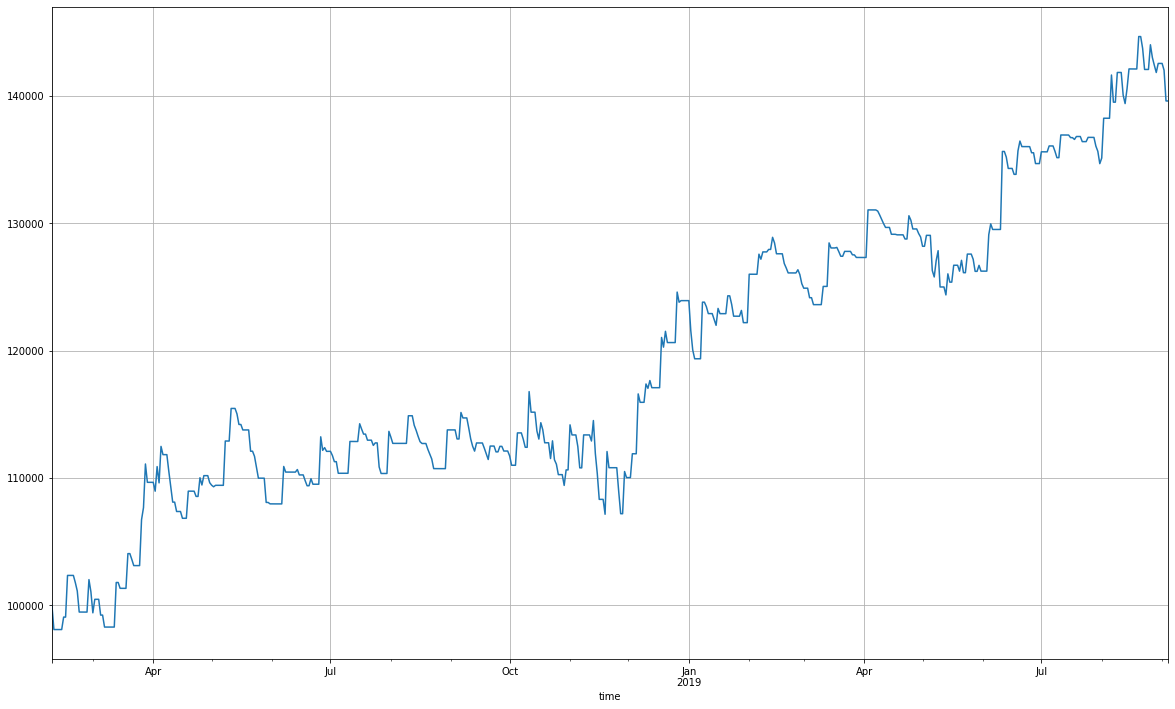

In [29]:
returns['dollars'].plot(figsize=(20,12), grid=True);

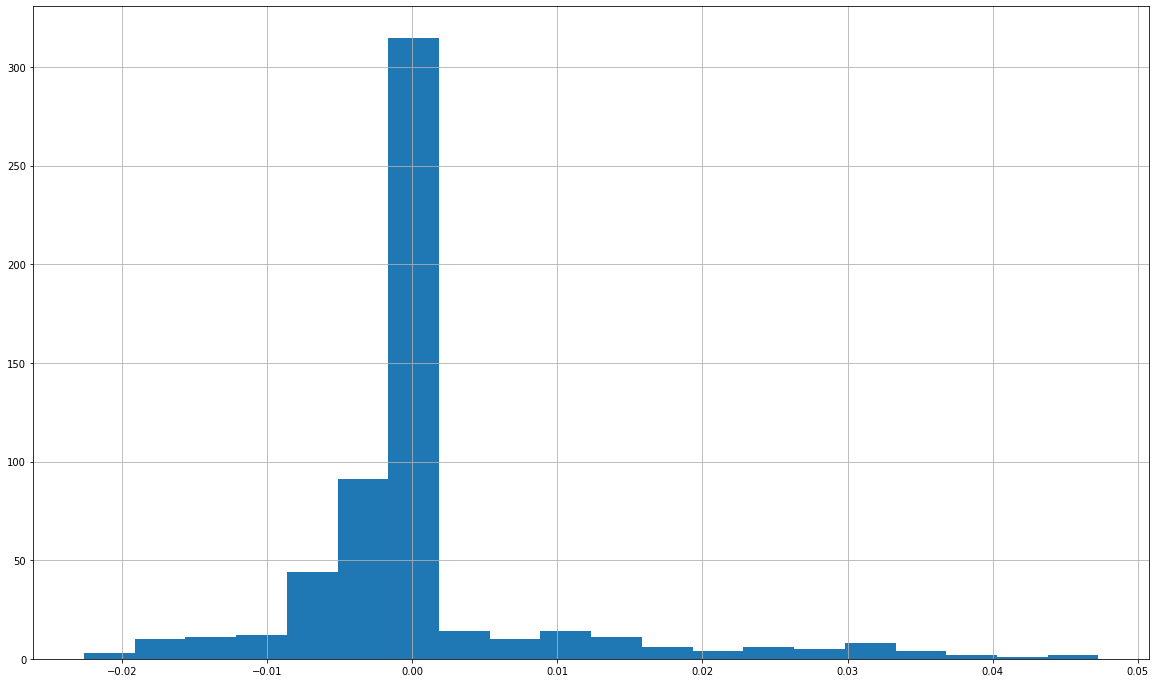

In [30]:
returns['returns'].hist(bins=20, figsize=(20,12), grid=True);

In [31]:
nq = df[df['contract'].str.startswith('NQ')]
nq

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,
2018-02-09 16:50:00,NQZ9,SELL,1,6300.250,[1],1,entry,1,1.3,USD,0.0,-3.02,-3.02,99996.98
2018-02-09 16:55:00,NQZ9,BUY,1,6348.625,[2],2,stop-out,2,1.3,USD,-967.5,-970.52,-973.54,99026.46
2018-02-09 18:05:00,NQZ9,SELL,1,6280.100,[3],3,entry,3,1.3,USD,0.0,-3.02,-976.56,99023.44
2018-02-09 20:10:00,NQZ9,BUY,1,6325.850,[4],4,stop-out,4,1.3,USD,-915.0,-918.02,-1894.58,98105.42
2018-02-09 21:56:00,NQZ9,BUY,1,6427.825,[5],5,entry,5,1.3,USD,0.0,-3.02,-1897.60,98102.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 16:16:00,NQZ9,SELL,1,7609.825,[821],951,entry,821,1.3,USD,0.0,-3.02,40778.09,140778.09
2019-09-03 16:41:00,NQZ9,BUY,1,7639.275,[822],952,stop-out,822,1.3,USD,-589.0,-592.02,40186.07,140186.07
2019-09-03 19:51:00,NQZ9,SELL,1,7596.550,[823],953,entry,823,1.3,USD,0.0,-3.02,40183.05,140183.05


In [32]:
nq['realizedPNL'].sum()

42109.51

In [33]:
nq['realizedPNL_net'].sum()

39618.00999999998

In [34]:
df['symbol'] = df['contract'].str[:2]
df

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,
2018-02-09 16:50:00,NQZ9,SELL,1,6300.250,[1],1,entry,1,1.3,USD,0.0,-3.02,-3.02,99996.98,NQ
2018-02-09 16:55:00,NQZ9,BUY,1,6348.625,[2],2,stop-out,2,1.3,USD,-967.5,-970.52,-973.54,99026.46,NQ
2018-02-09 18:05:00,NQZ9,SELL,1,6280.100,[3],3,entry,3,1.3,USD,0.0,-3.02,-976.56,99023.44,NQ
2018-02-09 20:10:00,NQZ9,BUY,1,6325.850,[4],4,stop-out,4,1.3,USD,-915.0,-918.02,-1894.58,98105.42,NQ
2018-02-09 21:56:00,NQZ9,BUY,1,6427.825,[5],5,entry,5,1.3,USD,0.0,-3.02,-1897.60,98102.40,NQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 16:16:00,NQZ9,SELL,1,7609.825,[821],951,entry,821,1.3,USD,0.0,-3.02,40778.09,140778.09,NQ
2019-09-03 16:41:00,NQZ9,BUY,1,7639.275,[822],952,stop-out,822,1.3,USD,-589.0,-592.02,40186.07,140186.07,NQ
2019-09-03 19:51:00,NQZ9,SELL,1,7596.550,[823],953,entry,823,1.3,USD,0.0,-3.02,40183.05,140183.05,NQ


In [35]:
df.groupby('symbol').realizedPNL.sum()

symbol
NQ    42109.51
Name: realizedPNL, dtype: float64

In [36]:
nq = df[df['symbol'] == 'NQ']

In [37]:
nq.price.count()

825

In [38]:
nq

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,
2018-02-09 16:50:00,NQZ9,SELL,1,6300.250,[1],1,entry,1,1.3,USD,0.0,-3.02,-3.02,99996.98,NQ
2018-02-09 16:55:00,NQZ9,BUY,1,6348.625,[2],2,stop-out,2,1.3,USD,-967.5,-970.52,-973.54,99026.46,NQ
2018-02-09 18:05:00,NQZ9,SELL,1,6280.100,[3],3,entry,3,1.3,USD,0.0,-3.02,-976.56,99023.44,NQ
2018-02-09 20:10:00,NQZ9,BUY,1,6325.850,[4],4,stop-out,4,1.3,USD,-915.0,-918.02,-1894.58,98105.42,NQ
2018-02-09 21:56:00,NQZ9,BUY,1,6427.825,[5],5,entry,5,1.3,USD,0.0,-3.02,-1897.60,98102.40,NQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 16:16:00,NQZ9,SELL,1,7609.825,[821],951,entry,821,1.3,USD,0.0,-3.02,40778.09,140778.09,NQ
2019-09-03 16:41:00,NQZ9,BUY,1,7639.275,[822],952,stop-out,822,1.3,USD,-589.0,-592.02,40186.07,140186.07,NQ
2019-09-03 19:51:00,NQZ9,SELL,1,7596.550,[823],953,entry,823,1.3,USD,0.0,-3.02,40183.05,140183.05,NQ


In [39]:
df.resample('D').last().price.count()

317

In [40]:
nq.price.count() / df.resample('D').last().price.count()

2.6025236593059935

In [41]:
df[df.reason == 'entry'].count()

contract           412
action             412
amount             412
price              412
exec_ids           412
order_id           412
reason             412
com_exec_id        412
commission         412
currency           412
realizedPNL        412
realizedPNL_net    412
cumsum             412
result             412
symbol             412
dtype: int64

In [42]:
df[df.reason != 'entry'].count()

contract           413
action             413
amount             413
price              413
exec_ids           413
order_id           413
reason             413
com_exec_id        413
commission         413
currency           413
realizedPNL        413
realizedPNL_net    413
cumsum             413
result             413
symbol             413
dtype: int64